In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el archivo
# Indicamos que la columna 'timestamp' debe ser parseada como fecha.
try:
    df = pd.read_csv("btc_data.csv", parse_dates=['timestamp'])
except FileNotFoundError:
    print("Error: Asegúrate de que 'btc_data.csv' esté en el mismo directorio.")
    exit()

# 2. Establecer 'timestamp' como índice (fundamental para series temporales)
df = df.set_index('timestamp')


--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7417613 entries, 2011-08-18 12:37:00 to 2025-09-24 15:29:00
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   open            float64
 1   close           float64
 2   volume          float64
 3   unix_timestamp  int64  
 4   high            float64
 5   low             float64
dtypes: float64(5), int64(1)
memory usage: 396.1 MB

Primeros registros:
                     open  close    volume  unix_timestamp  high   low
timestamp                                                             
2011-08-18 12:37:00  10.9   10.9  0.489908      1313671020  10.9  10.9
2011-08-18 12:38:00  10.9   10.9  0.000000      1313671080  10.9  10.9
2011-08-18 12:39:00  10.9   10.9  0.000000      1313671140  10.9  10.9
2011-08-18 12:40:00  10.9   10.9  0.000000      1313671200  10.9  10.9
2011-08-18 12:41:00  10.9   10.9  0.000000      1313671260  10.9  10.9


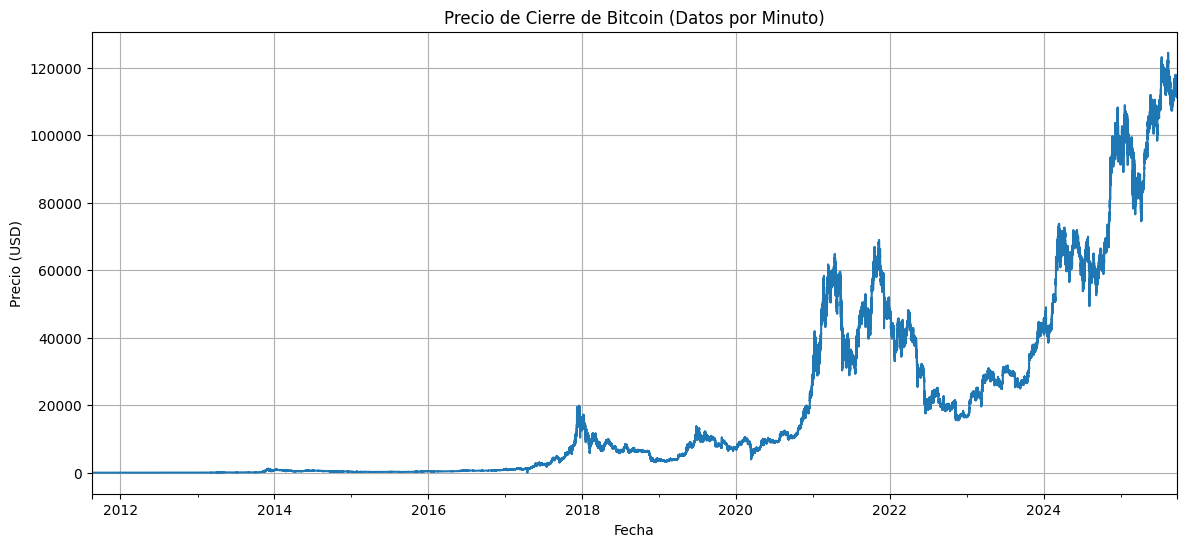

In [4]:
# 3. Mostrar la estructura inicial (opcional, pero útil)
print("--- Información del DataFrame ---")
df.info()
print("\nPrimeros registros:")
print(df.head())

# 4. Generar el gráfico de la serie temporal (Precio de Cierre)
plt.figure(figsize=(14, 6))
# Graficamos el precio de cierre, que es el objetivo de predicción principal
df['close'].plot(title='Precio de Cierre de Bitcoin (Datos por Minuto)', grid=True)
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.show()

--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7417613 entries, 2011-08-18 12:37:00 to 2025-09-24 15:29:00
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   open            float64
 1   close           float64
 2   volume          float64
 3   unix_timestamp  int64  
 4   high            float64
 5   low             float64
dtypes: float64(5), int64(1)
memory usage: 396.1 MB

Primeros registros:
                     open  close    volume  unix_timestamp  high   low
timestamp                                                             
2011-08-18 12:37:00  10.9   10.9  0.489908      1313671020  10.9  10.9
2011-08-18 12:38:00  10.9   10.9  0.000000      1313671080  10.9  10.9
2011-08-18 12:39:00  10.9   10.9  0.000000      1313671140  10.9  10.9
2011-08-18 12:40:00  10.9   10.9  0.000000      1313671200  10.9  10.9
2011-08-18 12:41:00  10.9   10.9  0.000000      1313671260  10.9  10.9
-------------------

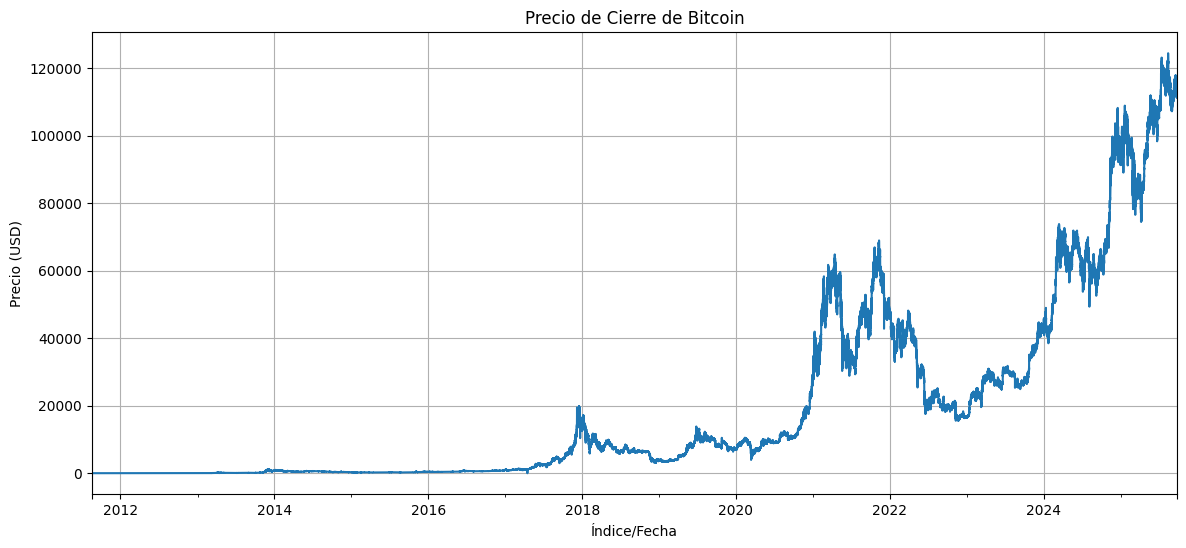

In [5]:
def analizar_y_graficar_df(df: pd.DataFrame, titulo_grafico: str = 'Precio de Cierre (Serie Temporal)'):
    print("--- Información del DataFrame ---")
    df.info()
    print("\nPrimeros registros:")
    print(df.head())
    print("---------------------------------")
    
    if 'close' in df.columns:
        plt.figure(figsize=(14, 6))
        # Graficamos el precio de cierre
        df['close'].plot(title=titulo_grafico, grid=True)
        plt.xlabel("Índice/Fecha") # Usamos 'Índice/Fecha' ya que no sabemos si el índice es datetime
        plt.ylabel("Precio (USD)")
        plt.show()
    else:
        print("\n Advertencia: La columna 'close' no se encontró en el DataFrame para graficar.")
        
analizar_y_graficar_df(df, titulo_grafico='Precio de Cierre de Bitcoin')


Dataset recortado, ahora inicia en: 2020-01-01 00:00:00
--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3014850 entries, 2020-01-01 00:00:00 to 2025-09-24 15:29:00
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   open            float64
 1   close           float64
 2   volume          float64
 3   unix_timestamp  int64  
 4   high            float64
 5   low             float64
dtypes: float64(5), int64(1)
memory usage: 161.0 MB

Primeros registros:
                        open    close     volume  unix_timestamp     high  \
timestamp                                                                   
2020-01-01 00:00:00  7165.72  7158.01   7.623856      1577836800  7165.72   
2020-01-01 00:01:00  7158.01  7154.84  20.386676      1577836860  7160.18   
2020-01-01 00:02:00  7156.07  7158.65   5.283010      1577836920  7158.65   
2020-01-01 00:03:00  7158.51  7161.73   1.027215      1577836980  7161.78  

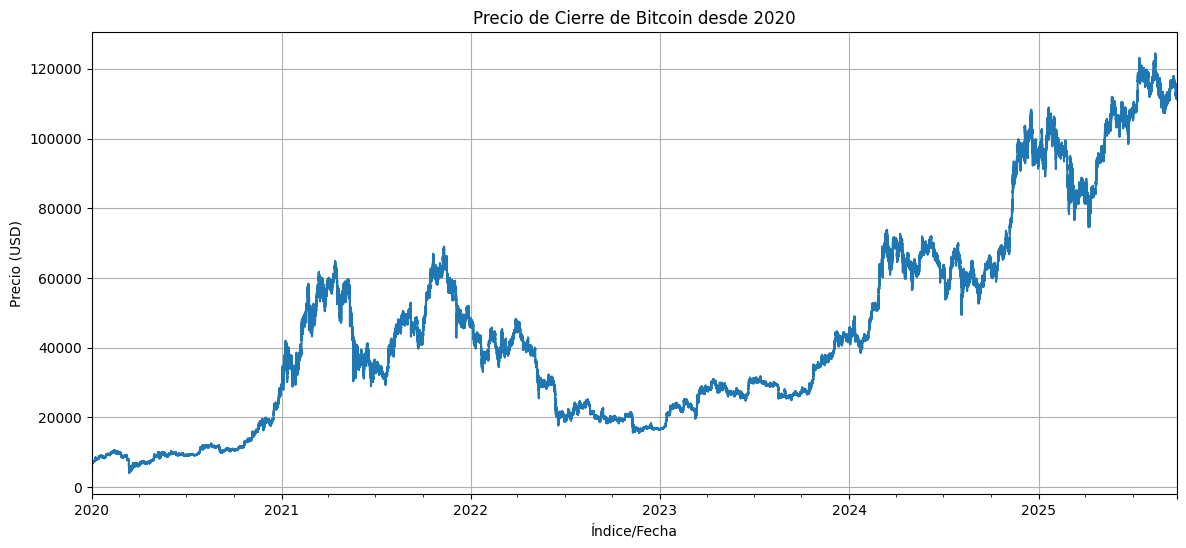

In [6]:
# Ejemplo de recorte: Iniciar desde Enero de 2020
df_recortado = df.loc['2020-01-01':]
print(f"Dataset recortado, ahora inicia en: {df_recortado.index.min()}")

analizar_y_graficar_df(df_recortado, titulo_grafico='Precio de Cierre de Bitcoin desde 2020')

In [7]:
# Remuestreo a Datos Diarios ('D')
df_diario = df_recortado.resample('D').agg({
    'open': 'first',      # Primer precio del día es el Open
    'high': 'max',        # Máximo precio del día
    'low': 'min',         # Mínimo precio del día
    'close': 'last',      # Último precio del día es el Close
    'volume': 'sum'       # Suma de volumen de todo el día
}).dropna() # Eliminamos días donde no hubo trading

print("\n--- DataFrame Diario Remuestreado ---")
print(df_diario.head())


# Remuestreo a Datos por hora ('h')
df_porHora = df_recortado.resample('h').agg({
    'open': 'first',      # Primer precio del día es el Open
    'high': 'max',        # Máximo precio del día
    'low': 'min',         # Mínimo precio del día
    'close': 'last',      # Último precio del día es el Close
    'volume': 'sum'       # Suma de volumen de todo el día
}).dropna() # Eliminamos días donde no hubo trading

print("\n--- DataFrame por Hora Remuestreado ---")
print(df_porHora.head())



--- DataFrame Diario Remuestreado ---
               open     high      low    close        volume
timestamp                                                   
2020-01-01  7165.72  7238.14  7136.05  7174.33   3350.630049
2020-01-02  7174.33  7186.18  6903.00  6945.02   8010.927387
2020-01-03  6945.02  7401.20  6854.67  7334.45  14056.392385
2020-01-04  7334.45  7398.00  7263.32  7348.63   4742.466210
2020-01-05  7348.63  7488.87  7312.22  7355.40   5942.014946

--- DataFrame por Hora Remuestreado ---
                        open     high      low    close      volume
timestamp                                                          
2020-01-01 00:00:00  7165.72  7165.72  7136.05  7150.35  250.849812
2020-01-01 01:00:00  7149.26  7204.94  7147.18  7194.52  232.203269
2020-01-01 02:00:00  7194.52  7218.42  7191.44  7217.00  189.937903
2020-01-01 03:00:00  7217.00  7217.00  7193.34  7196.98  234.739781
2020-01-01 04:00:00  7196.99  7200.62  7183.85  7186.41  205.908729


In [25]:
#Reserva de Datos para Testeo Final
#Guardo 2025 para testeo final
punto_corte = '2025-01-01'

df_diario_train_val = df_diario.loc[:punto_corte].iloc[:-1] # Hasta antes de 2025-01-01
df_diario_test_final = df_diario.loc[punto_corte:]       # Desde 2025-01-01 en adelante  

print("--- División del Dataset por dia---")
print(f"Inicio del Set de Entrenamiento/Validación: {df_diario_train_val.index.min()}")
print(f"Fin del Set de Entrenamiento/Validación: {df_diario_train_val.index.max()} ({len(df_diario_train_val)} días)")
print(f"Inicio del Set de Testeo Final: {df_diario_test_final.index.min()}")
print(f"Fin del Set de Testeo Final: {df_diario_test_final.index.max()} ({len(df_diario_test_final)} días)")
print("-" * 30)
print("-" * 30)


###df_porHora
df_porHora_train_val = df_porHora.loc[:punto_corte].iloc[:-1] # Hasta antes de 2025-01-01
df_porHora_test_final = df_porHora.loc[punto_corte:]       # Desde 2025-01-01 en adelante
print("--- División del Dataset por Hora ---")
print(f"Inicio del Set de Entrenamiento/Validación por Hora: {df_porHora_train_val.index.min()}")
print(f"Fin del Set de Entrenamiento/Validación por Hora: {df_porHora_train_val.index.max()} ({len(df_porHora_train_val)} horas)")
print(f"Inicio del Set de Testeo Final por Hora: {df_porHora_test_final.index.min()}")
print(f"Fin del Set de Testeo Final por Hora: {df_porHora_test_final.index.max()} ({len(df_porHora_test_final)} horas)")
print("-" * 30)
print("-" * 30)

###df_porMinuto
df_porMinuto_train_val = df_recortado.loc[:punto_corte].iloc[:-1] # Hasta antes de 2025-01-01
df_porMinuto_test_final = df_recortado.loc[punto_corte:]       # Desde 2025-01-01 en adelante
print("--- División del Dataset por Minuto ---")
print(f"Inicio del Set de Entrenamiento/Validación por Minuto: {df_porMinuto_train_val.index.min()}")
print(f"Fin del Set de Entrenamiento/Validación por Minuto: {df_porMinuto_train_val.index.max()} ({len(df_porMinuto_train_val)} minutos)")
print(f"Inicio del Set de Testeo Final por Minuto: {df_porMinuto_test_final.index.min()}")
print(f"Fin del Set de Testeo Final por Minuto: {df_porMinuto_test_final.index.max()} ({len(df_porMinuto_test_final)} minutos)")
print("-" * 30)
print("-" * 30)



--- División del Dataset por dia---
Inicio del Set de Entrenamiento/Validación: 2020-01-01 00:00:00
Fin del Set de Entrenamiento/Validación: 2024-12-31 00:00:00 (1827 días)
Inicio del Set de Testeo Final: 2025-01-01 00:00:00
Fin del Set de Testeo Final: 2025-09-24 00:00:00 (267 días)
------------------------------
------------------------------
--- División del Dataset por Hora ---
Inicio del Set de Entrenamiento/Validación por Hora: 2020-01-01 00:00:00
Fin del Set de Entrenamiento/Validación por Hora: 2025-01-01 22:00:00 (43871 horas)
Inicio del Set de Testeo Final por Hora: 2025-01-01 00:00:00
Fin del Set de Testeo Final por Hora: 2025-09-24 15:00:00 (6400 horas)
------------------------------
------------------------------
--- División del Dataset por Minuto ---
Inicio del Set de Entrenamiento/Validación por Minuto: 2020-01-01 00:00:00
Fin del Set de Entrenamiento/Validación por Minuto: 2025-01-01 23:58:00 (2632319 minutos)
Inicio del Set de Testeo Final por Minuto: 2025-01-01 00:00

In [26]:
# --- GUARDA TUS DATASETS LIMPIOS ---
df_diario_train_val.to_csv("data_processed/df_diario_train_val.csv")
df_diario_test_final.to_csv("data_processed/df_diario_test_final.csv")



df_porHora_train_val.to_csv("data_processed/df_horario_train_val.csv")
df_porHora_test_final.to_csv("data_processed/df_horario_test_final.csv")

df_porMinuto_train_val.to_csv("data_processed/df_minuto_train_val.csv")
df_porMinuto_test_final.to_csv("data_processed/df_minuto_test_final.csv")


In [27]:
# Definimos el punto de corte (inicio de 2025)
punto_corte = '2025-01-01'

# 1. División del dataset (sigue siendo en granularidad de 1 minuto)
df_porMinuto_train_val_raw = df_recortado.loc[:punto_corte].iloc[:-1] # Hasta antes de 2025-01-01
df_porMinuto_test_final_raw = df_recortado.loc[punto_corte:]# Desde 2025-01-01 en adelante

print("--- División del Dataset por Minuto (Original) ---")
print(f"Número de registros de entrenamiento original: {len(df_porMinuto_train_val_raw)} minutos")
print("-" * 30)

# ----------------------------------------------------------------------
# 2. REMUESTREO A 5 MINUTOS (5T)
# ----------------------------------------------------------------------

def remuestrear_a_5min(df_minuto_raw):
    """Aplica el remuestreo de 1 minuto a 5 minutos."""
    # Usamos '5T' o '5min' para la ventana de 5 minutos
    df_5min = df_minuto_raw.resample('5T').agg({
        'open': 'first',      # Primer precio del bloque de 5 min es el Open
        'high': 'max',        # Máximo precio del bloque de 5 min
        'low': 'min',         # Mínimo precio del bloque de 5 min
        'close': 'last',      # Último precio del bloque de 5 min es el Close
        'volume': 'sum'       # Suma de volumen total en los 5 minutos
    }).dropna() # Eliminamos bloques de 5 min incompletos o sin datos

    return df_5min

# Aplicar el remuestreo a ambos sets
df_porMinuto_train_val = remuestrear_a_5min(df_porMinuto_train_val_raw)
df_porMinuto_test_final = remuestrear_a_5min(df_porMinuto_test_final_raw)


# 3. Impresión y Confirmación
print("--- División del Dataset por 5 Minutos (Remuestreado) ---")
print(f"Inicio Set de Entrenamiento/Validación (5 min): {df_porMinuto_train_val.index.min()}")
print(f"Fin Set de Entrenamiento/Validación (5 min): {df_porMinuto_train_val.index.max()} ({len(df_porMinuto_train_val)} registros)")
print(f"Inicio Set de Testeo Final (5 min): {df_porMinuto_test_final.index.min()}")
print(f"Fin Set de Testeo Final (5 min): {df_porMinuto_test_final.index.max()} ({len(df_porMinuto_test_final)} registros)")
print("-" * 30)

# 4. Guardado de los nuevos datasets
df_porMinuto_train_val.to_csv("data_processed/df_cincoMinutos_train_val.csv")
df_porMinuto_test_final.to_csv("data_processed/df_cincoMinutos_test_final.csv")

--- División del Dataset por Minuto (Original) ---
Número de registros de entrenamiento original: 2632319 minutos
------------------------------


C:\Users\crges\AppData\Local\Temp\ipykernel_22276\1504366804.py:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_5min = df_minuto_raw.resample('5T').agg({
C:\Users\crges\AppData\Local\Temp\ipykernel_22276\1504366804.py:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_5min = df_minuto_raw.resample('5T').agg({


--- División del Dataset por 5 Minutos (Remuestreado) ---
Inicio Set de Entrenamiento/Validación (5 min): 2020-01-01 00:00:00
Fin Set de Entrenamiento/Validación (5 min): 2025-01-01 23:55:00 (526464 registros)
Inicio Set de Testeo Final (5 min): 2025-01-01 00:00:00
Fin Set de Testeo Final (5 min): 2025-09-24 15:25:00 (76794 registros)
------------------------------
